## Importações

In [373]:
import sys, os, importlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import lambda2nu, nu2lambda, c

In [374]:
from IPython.core.display import HTML
from IPython.core.pylabtools import figsize
from IPython.display import display, Math

HTML('<center><h2>Texto Centralizado</h2></center>')

HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [375]:
# lumapiFile = "/opt/lumerical/v221/api/python/lumapi.py"
lumapiFile = "C:\\Program Files\\Lumerical\\v221\\api\\python\\lumapi.py"
spec = importlib.util.spec_from_file_location("lumapi", lumapiFile)
lumapi = importlib.util.module_from_spec(spec)
sys.modules["lumapi"] = lumapi
spec.loader.exec_module(lumapi)
fdtdApi = lumapi.FDTD(hide = False)

C:\Program Files\Lumerical\v221\api\python\lumapi.py:796: SyntaxWarning: invalid escape sequence '\s'
  message = re.sub('^(Error:)\s(prompt line)\s[0-9]+:', '', str(rvals[2])).strip()


In [376]:
um = 1e-6
nm = 1e-9

## Barra de progresso

In [377]:
from IPython.display import clear_output

def clear_console():
    # No loop, use:
    clear_output(wait=True)

def porcentagem(atual,total):
    clear_console()
    calculo = (atual)/(total) *100
    print(f"Porcentagem: {calculo:.2f} %")


## Descrições do material

In [426]:
sub_material = 'SiO2 (Glass) - Palik'
gap = 200*nm

comprimento_seccao = 2*um

comprimento = 10.38*um
largura = 0.45*um
altura = 0.22*um

x_core = 0
y_core = 0.0*um
z_core = 0.0*um

core_material = 'Si (Silicon) - Palik'

radius = 10*um

## Criar o material

In [427]:
fdtdApi.switchtolayout()

fdtdApi.deleteall()

fdtdApi.addrect()
fdtdApi.set('name', 'core_1')
fdtdApi.set('material', core_material)
fdtdApi.set("x", x_core)
fdtdApi.set("x span", comprimento)
fdtdApi.set("y", largura + gap)
fdtdApi.set("y span", largura)
fdtdApi.set("z", z_core)
fdtdApi.set("z span", altura)

fdtdApi.copy()
fdtdApi.set('name', 'core_2')
fdtdApi.set("x", x_core)
fdtdApi.set("x span", 3 * radius + comprimento)
fdtdApi.set("y", y_core)

fdtdApi.addrect()
fdtdApi.set('name', 'sec1')
fdtdApi.set('material', core_material)
fdtdApi.set("x", -comprimento/2 - radius)
fdtdApi.set("x span", largura)
fdtdApi.set("y", largura + gap + radius + comprimento_seccao/2)
fdtdApi.set("y span", comprimento_seccao)
fdtdApi.set("z", z_core)
fdtdApi.set("z span", altura)

fdtdApi.addrect()
fdtdApi.set('name', 'sec2')
fdtdApi.set('material', core_material)
fdtdApi.set("x", comprimento/2 + radius)
fdtdApi.set("x span", largura)
fdtdApi.set("y", largura + gap + radius + comprimento_seccao/2)
fdtdApi.set("y span", comprimento_seccao)
fdtdApi.set("z", z_core)
fdtdApi.set("z span", altura)

fdtdApi.addobject("90_bend_wg")
fdtdApi.set('name', 'bend1')
fdtdApi.set("first axis", 'z')
fdtdApi.set("base width", largura)
fdtdApi.set("base height", altura)
fdtdApi.set("radius", radius)
fdtdApi.set("rotation 1", -90)
fdtdApi.set("x", comprimento / 2)
fdtdApi.set("y", largura + gap + radius)
fdtdApi.set("z", z_core)

fdtdApi.copy()
fdtdApi.set('name', 'bend2')
fdtdApi.set("rotation 1", -180)
fdtdApi.set("x", -comprimento / 2)


## Descrições do solver

In [429]:
# Tempo de simulação
simulation_time = (np.pi*radius+5*comprimento)*7/c + 200e-15

# Dimensões da porta
portSize = 2 * um
portBcDist = 6 * um

# Material
backGroundMaterial = core_material

tempo_de_simulacao = (np.pi*radius+comprimento)/c + 200e-15

# Condições de fronteira
z_min_bc = "Symmetric"

fde_solve_material = sub_material
x_fdtd = 0
y_fdtd = 3*um
z_fdtd = 0.0*um

x_span_fdtd = 3.2*comprimento
y_span_fdtd = 18*um
z_span_fdtd = 5.0*um

wavelength = 1550*nm
startWvg = 1500*nm
stopWvg = 1600*nm

number_of_points = 21

# Precisão do mesh
mesh_accuracy = 2

In [430]:
fdtdApi.select("FDTD")
fdtdApi.delete()

fdtdApi.addfdtd()
fdtdApi.set("x", x_fdtd)
fdtdApi.set("y", y_fdtd)
fdtdApi.set("z", z_fdtd)
fdtdApi.set("x span", x_span_fdtd)
fdtdApi.set("y span", y_span_fdtd)
fdtdApi.set("z span", z_span_fdtd)
fdtdApi.set("background material", "SiO2 (Glass) - Palik")
fdtdApi.set("global monitor frequency points", number_of_points)
fdtdApi.set("global source wavelength start", startWvg)
fdtdApi.set("global source wavelength stop", stopWvg)
fdtdApi.set("mesh accuracy", mesh_accuracy)
fdtdApi.set("z min bc", z_min_bc)

## Adição das portas

In [431]:
fdtdApi.select("FDTD::ports")
fdtdApi.delete()

x_position = -comprimento/2 -11*um 
x_position2 = -comprimento/2 - radius

fdtdApi.addport()
fdtdApi.set("name", "port1")
fdtdApi.set("injection axis", "y")
fdtdApi.set("direction", "backward")
fdtdApi.set("x", x_position2)
fdtdApi.set("y", 1.12*radius)
fdtdApi.set("x span", largura*4)
fdtdApi.set("z span", altura*4)

fdtdApi.addport()
fdtdApi.set("name", "port2")
fdtdApi.set("injection axis", "y")
fdtdApi.set("direction", "backward")
fdtdApi.set("x", -x_position2)
fdtdApi.set("y", 1.12*radius)
fdtdApi.set("x span", largura*4)
fdtdApi.set("z span", altura*4)

fdtdApi.addport()
fdtdApi.set("name", "port3")
fdtdApi.set("injection axis", "x")
fdtdApi.set("x", x_position)
fdtdApi.set("y", x_fdtd)
fdtdApi.set("y span", largura*4)
fdtdApi.set("z span", altura*4)

fdtdApi.addport()
fdtdApi.set("name", "port4")
fdtdApi.set("injection axis", "x")
fdtdApi.set("direction", "backward")
fdtdApi.set("x", -x_position)
fdtdApi.set("y", x_fdtd)
fdtdApi.set("y span", largura*4)
fdtdApi.set("z span", altura*4)



## Adição dos monitores

In [ ]:
fdtdApi.select("indice")
fdtdApi.delete()

fdtdApi.select("perfil")
fdtdApi.delete()

fdtdApi.addindex()
fdtdApi.set("name", "indice")
fdtdApi.set("x", x_fdtd)
fdtdApi.set("y", 1.2*y_fdtd)
fdtdApi.set("x span", x_span_fdtd)
fdtdApi.set("y span", y_span_fdtd)

fdtdApi.addprofile()
fdtdApi.set("name", "perfil")
fdtdApi.set("x", x_fdtd)
fdtdApi.set("y", 1.2*y_fdtd)
fdtdApi.set("x span", x_span_fdtd)
fdtdApi.set("y span", y_span_fdtd)


## Simulação

In [435]:
fdtdApi.save("FDTD_SIMULACAO")
fdtdApi.run(3)

## Perfil de campo

In [439]:
eField = np.abs(np.squeeze(fdtdApi.getelectric("perfil")))**2

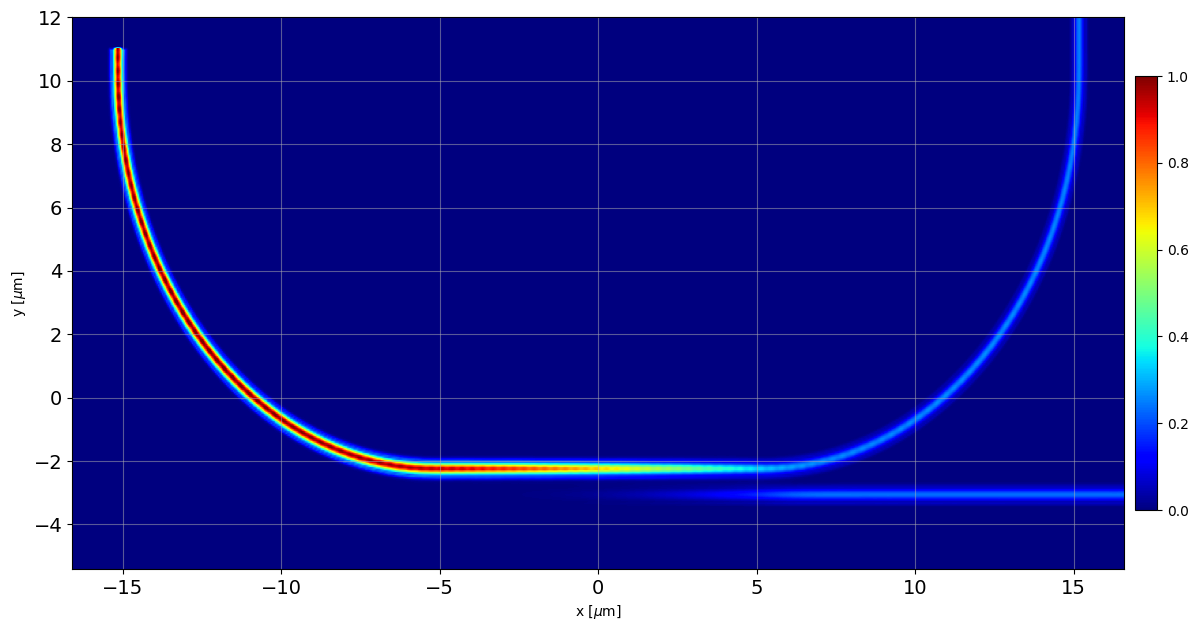

In [440]:
# Apresenta o campo elétrico obtido.

indxLambda = 10
x_eField = fdtdApi.getdata("perfil", "x")
y_eField = fdtdApi.getdata("perfil", "y")


# Escala linear.
plt.figure(figsize=(14, 10))

xmin = 1e6 * np.min(x_eField)
xmax = 1e6 * np.max(x_eField)
ymin = 1e6 * np.min(y_eField)
ymax = 1e6 * np.max(y_eField)

im = plt.imshow(np.rot90(eField[:, :, indxLambda]), cmap=plt.cm.jet, extent=[xmin,xmax,ymin,ymax], vmin=0, vmax=1)

plt.colorbar(im,fraction=0.02, pad=0.01)

plt.xlabel(r'x [$\mu$m]')
plt.ylabel(r'y [$\mu$m]')
plt.grid(which='major', alpha=0.5)
plt.tick_params(axis='both', labelsize=14)

plt.show()


## Transmissão

<>:20: SyntaxWarning: invalid escape sequence '\l'
<>:20: SyntaxWarning: invalid escape sequence '\l'
C:\Users\gson5\AppData\Local\Temp\ipykernel_18460\1803772819.py:20: SyntaxWarning: invalid escape sequence '\l'
  plt.axvline(x = 1.55, linestyle = '--', label="$\lambda$ = 1.55 $\mu$m")


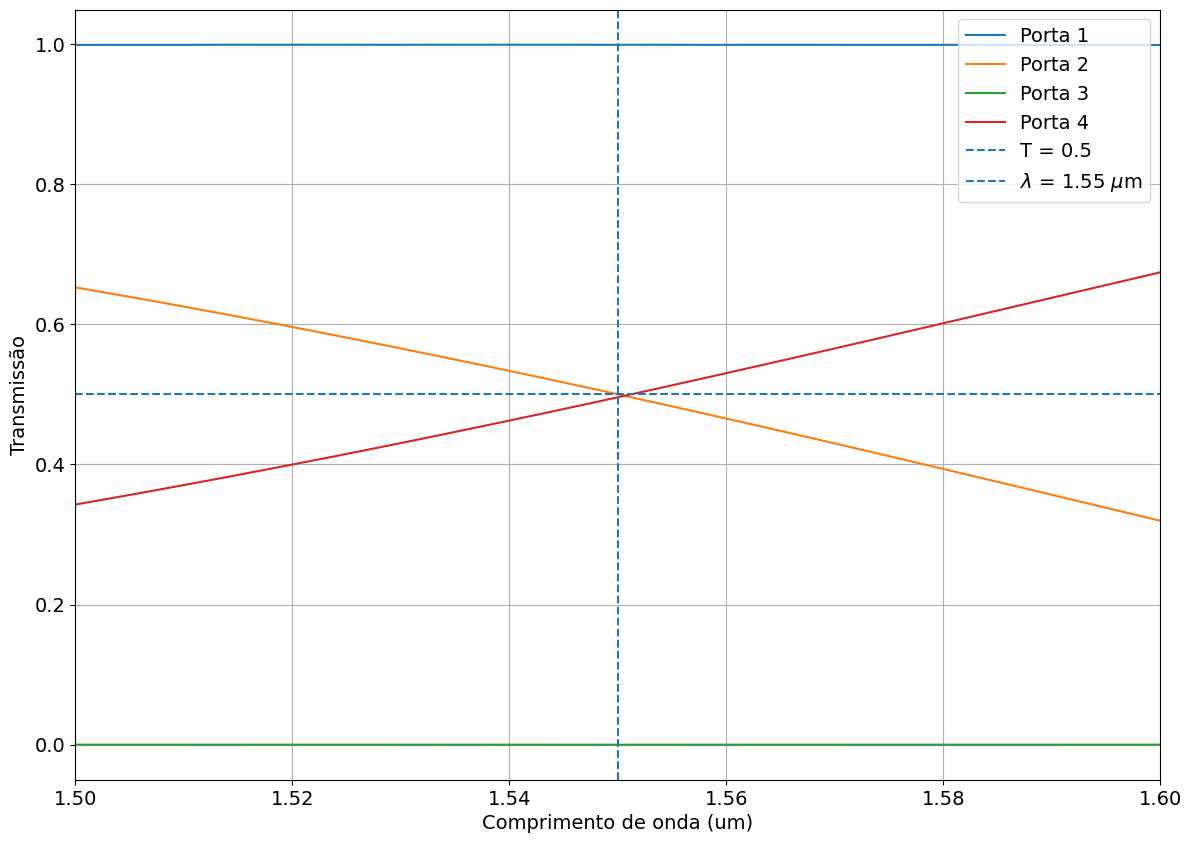

In [436]:
T1 = fdtdApi.getresult("FDTD::ports::port1","T")
T2 = fdtdApi.getresult("FDTD::ports::port2","T")
T3 = fdtdApi.getresult("FDTD::ports::port3","T")
T4 = fdtdApi.getresult("FDTD::ports::port4","T")

lmbd = nu2lambda(fdtdApi.getdata("perfil", "f"))
array = np.arange(21)

plt.figure(figsize=(14,10))

plt.plot(T1['lambda']*1e6,np.abs(T1['T']), label="Porta 1")
plt.plot(T1['lambda']*1e6,T2['T'], label="Porta 2")
plt.plot(T1['lambda']*1e6,T3['T'], label="Porta 3")
plt.plot(T1['lambda']*1e6,T4['T'], label="Porta 4")

plt.xlabel("Comprimento de onda (um)", fontsize = 14)
plt.ylabel("Transmissão", fontsize = 14)
plt.xlim(min(T1['lambda']*1e6),max(T1['lambda']*1e6))
plt.axhline(y = 0.5, linestyle = '--', label='T = 0.5')
plt.axvline(x = 1.55, linestyle = '--', label="$\lambda$ = 1.55 $\mu$m")
plt.legend(fontsize = 14, loc = 'best')
plt.tick_params(axis='both', labelsize=14)

plt.grid()

C:\Users\gson5\AppData\Local\Temp\ipykernel_18460\3485719829.py:13: RuntimeWarning: invalid value encountered in log10
  plt.plot(T1['lambda']*1e6,10*np.log10(T3['T']), label="Porta 3")


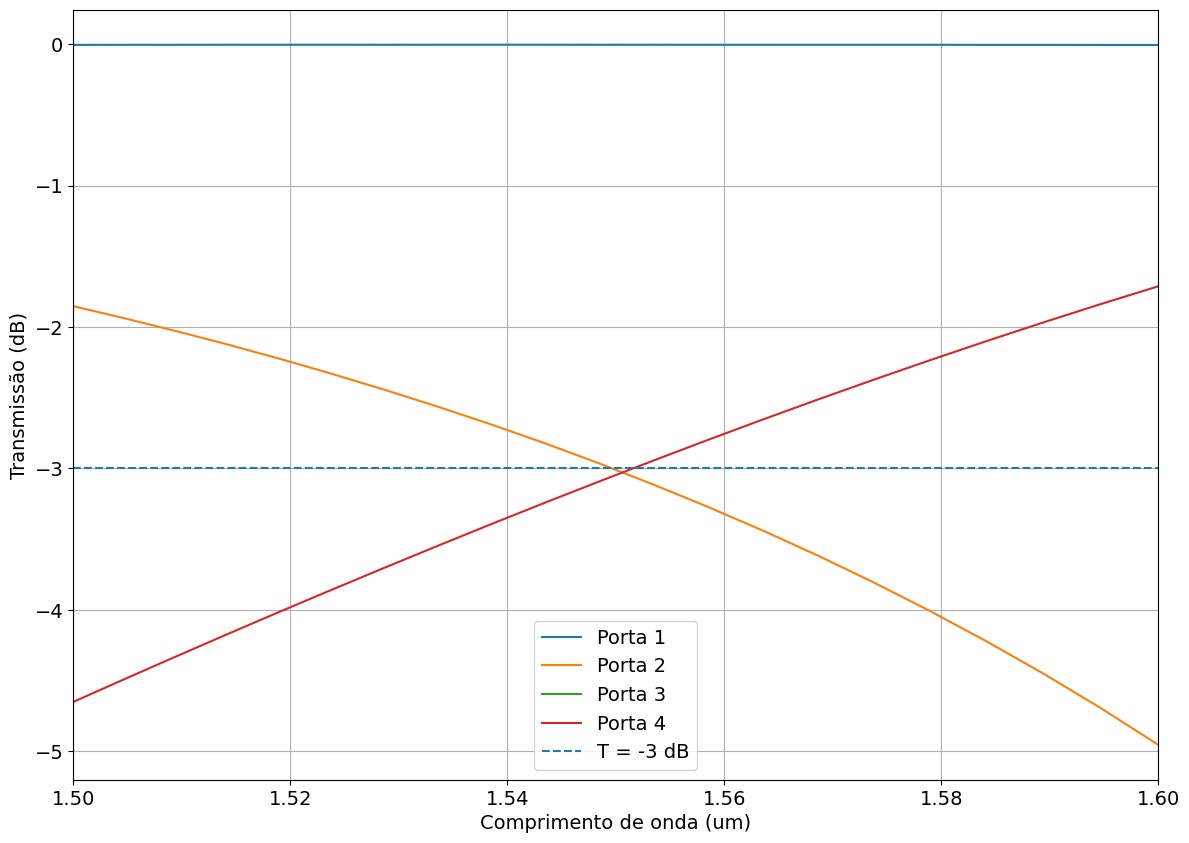

In [437]:
T1 = fdtdApi.getresult("FDTD::ports::port1","T")
T2 = fdtdApi.getresult("FDTD::ports::port2","T")
T3 = fdtdApi.getresult("FDTD::ports::port3","T")
T4 = fdtdApi.getresult("FDTD::ports::port4","T")

lmbd = nu2lambda(fdtdApi.getdata("perfil", "f"))
array = np.arange(21)

plt.figure(figsize=(14,10))

plt.plot(T1['lambda']*1e6,10*np.log10(np.abs(T1['T'])), label="Porta 1")
plt.plot(T1['lambda']*1e6,10*np.log10(T2['T']), label="Porta 2")
plt.plot(T1['lambda']*1e6,10*np.log10(T3['T']), label="Porta 3")
plt.plot(T1['lambda']*1e6,10*np.log10(T4['T']), label="Porta 4")

plt.xlabel("Comprimento de onda (um)", fontsize = 14)
plt.ylabel("Transmissão (dB)", fontsize = 14)
plt.xlim(min(T1['lambda']*1e6),max(T1['lambda']*1e6))
plt.axhline(y = -3, linestyle = '--', label='T = -3 dB')
plt.legend(fontsize = 14, loc = 'best')
plt.tick_params(axis='both', labelsize=14)

plt.grid()

In [425]:
comprimento_de_onda = 1550e-9
indice_mais_proximo = np.abs(T1['lambda'] - comprimento_de_onda).argmin()

print(f"Transmissão Porta 2 (1550 nm) = {(np.squeeze(T2['T'][indice_mais_proximo]) ):,.3f}")
print(f"Transmissão Porta 4 (1550 nm) = {(np.squeeze(T4['T'][indice_mais_proximo])):,.3f}")

print(f"Transmissão Porta 2 (dB) (1550 nm) = {np.squeeze(10*np.log10(T2['T'][indice_mais_proximo])) :,.3f}")
print(f"Transmissão Porta 4 (dB) (1550 nm) = {np.squeeze(10*np.log10(T4['T'][indice_mais_proximo])) :,.3f}")

print(f"Perda de inserção Porta 4 (1550 nm) = {(np.squeeze(10*np.log10(T2['T'][indice_mais_proximo]+T4['T'][indice_mais_proximo]))):.3f}")


Transmissão Porta 2 (1550 nm) = 0.470
Transmissão Porta 4 (1550 nm) = 0.445
Transmissão Porta 2 (dB) (1550 nm) = -3.279
Transmissão Porta 4 (dB) (1550 nm) = -3.515
Perda de inserção Porta 4 (1550 nm) = -0.385


## Otimização

In [367]:
L_x = np.linspace(9*um, 12*um,14)

Transmission_1 = []
Transmission_2 = []
Transmission_3 = []
Transmission_4 = []

for i in range(len(L_x)):
    
    porcentagem(i, len(L_x))

    fdtdApi.switchtolayout()

    fdtdApi.deleteall()
    fdtdApi.addrect()
    fdtdApi.set('name', 'core_1')
    fdtdApi.set('material', core_material)
    fdtdApi.set("x", x_core)
    fdtdApi.set("x span", L_x[i])
    fdtdApi.set("y", largura + gap)
    fdtdApi.set("y span", largura)
    fdtdApi.set("z", z_core)
    fdtdApi.set("z span", altura)

    fdtdApi.copy()
    fdtdApi.set('name', 'core_2')
    fdtdApi.set("x", x_core)
    fdtdApi.set("x span", 3 * radius + L_x[i])
    fdtdApi.set("y", y_core)

    fdtdApi.addrect()
    fdtdApi.set('name', 'sec1')
    fdtdApi.set('material', core_material)
    fdtdApi.set("x", -L_x[i]/2 - radius)
    fdtdApi.set("x span", largura)
    fdtdApi.set("y", largura + gap + radius + comprimento_seccao/2)
    fdtdApi.set("y span", comprimento_seccao)
    fdtdApi.set("z", z_core)
    fdtdApi.set("z span", altura)

    fdtdApi.addrect()
    fdtdApi.set('name', 'sec2')
    fdtdApi.set('material', core_material)
    fdtdApi.set("x", L_x[i]/2 + radius)
    fdtdApi.set("x span", largura)
    fdtdApi.set("y", largura + gap + radius + comprimento_seccao/2)
    fdtdApi.set("y span", comprimento_seccao)
    fdtdApi.set("z", z_core)
    fdtdApi.set("z span", altura)

    fdtdApi.addobject("90_bend_wg")
    fdtdApi.set('name', 'bend1')
    fdtdApi.set("first axis", 'z')
    fdtdApi.set("base width", largura)
    fdtdApi.set("base height", altura)
    fdtdApi.set("radius", radius)
    fdtdApi.set("rotation 1", -90)
    fdtdApi.set("x", L_x[i] / 2)
    fdtdApi.set("y", largura + gap + radius)
    fdtdApi.set("z", z_core)

    fdtdApi.copy()
    fdtdApi.set('name', 'bend2')
    fdtdApi.set("rotation 1", -180)
    fdtdApi.set("x", -L_x[i] / 2)

    fdtdApi.select("FDTD")
    fdtdApi.delete()

    fdtdApi.addfdtd()
    fdtdApi.set("x", x_fdtd)
    fdtdApi.set("y", y_fdtd)
    fdtdApi.set("z", z_fdtd)
    fdtdApi.set("x span", L_x[i] + 2*radius + 3*um)
    fdtdApi.set("y span", y_span_fdtd)
    fdtdApi.set("z span", z_span_fdtd)
    fdtdApi.set("background material", "SiO2 (Glass) - Palik")
    fdtdApi.set("global monitor frequency points", number_of_points)
    fdtdApi.set("global source wavelength start", startWvg)
    fdtdApi.set("global source wavelength stop", stopWvg)
    fdtdApi.set("mesh accuracy", mesh_accuracy)
    fdtdApi.set("z min bc", "Symmetric")

    x_position = -L_x[i]/2 -11*um 
    x_position2 = -L_x[i]/2 - radius

    fdtdApi.addport()
    fdtdApi.set("name", "port1")
    fdtdApi.set("injection axis", "y")
    fdtdApi.set("direction", "backward")
    fdtdApi.set("x", x_position2)
    fdtdApi.set("y", 1.12*radius)
    fdtdApi.set("x span", largura*4)
    fdtdApi.set("z span", altura*4)

    fdtdApi.addport()
    fdtdApi.set("name", "port2")
    fdtdApi.set("injection axis", "y")
    fdtdApi.set("direction", "backward")
    fdtdApi.set("x", -x_position2)
    fdtdApi.set("y", 1.12*radius)
    fdtdApi.set("x span", largura*4)
    fdtdApi.set("z span", altura*4)

    fdtdApi.addport()
    fdtdApi.set("name", "port3")
    fdtdApi.set("injection axis", "x")
    fdtdApi.set("x", x_position)
    fdtdApi.set("y", x_fdtd)
    fdtdApi.set("y span", largura*4)
    fdtdApi.set("z span", altura*4)

    fdtdApi.addport()
    fdtdApi.set("name", "port4")
    fdtdApi.set("injection axis", "x")
    fdtdApi.set("direction", "backward")
    fdtdApi.set("x", -x_position)
    fdtdApi.set("y", x_fdtd)
    fdtdApi.set("y span", largura*4)
    fdtdApi.set("z span", altura*4)


    fdtdApi.save("FDTD_SIMULACAO")
    fdtdApi.run(3)
    porcentagem(i+1, len(L_x))

    Transmission_1.append(fdtdApi.getresult("FDTD::ports::port1","T")['T'])
    Transmission_2.append(fdtdApi.getresult("FDTD::ports::port2","T")['T'])
    Transmission_3.append(fdtdApi.getresult("FDTD::ports::port3","T")['T'])
    Transmission_4.append(fdtdApi.getresult("FDTD::ports::port4","T")['T'])   


Porcentagem: 100.00 %


In [368]:
np.savetxt('T1.txt', Transmission_1, fmt='%f')
np.savetxt('T2.txt', Transmission_2, fmt='%f')
np.savetxt('T3.txt', Transmission_3, fmt='%f')
np.savetxt('T4.txt', Transmission_4, fmt='%f')

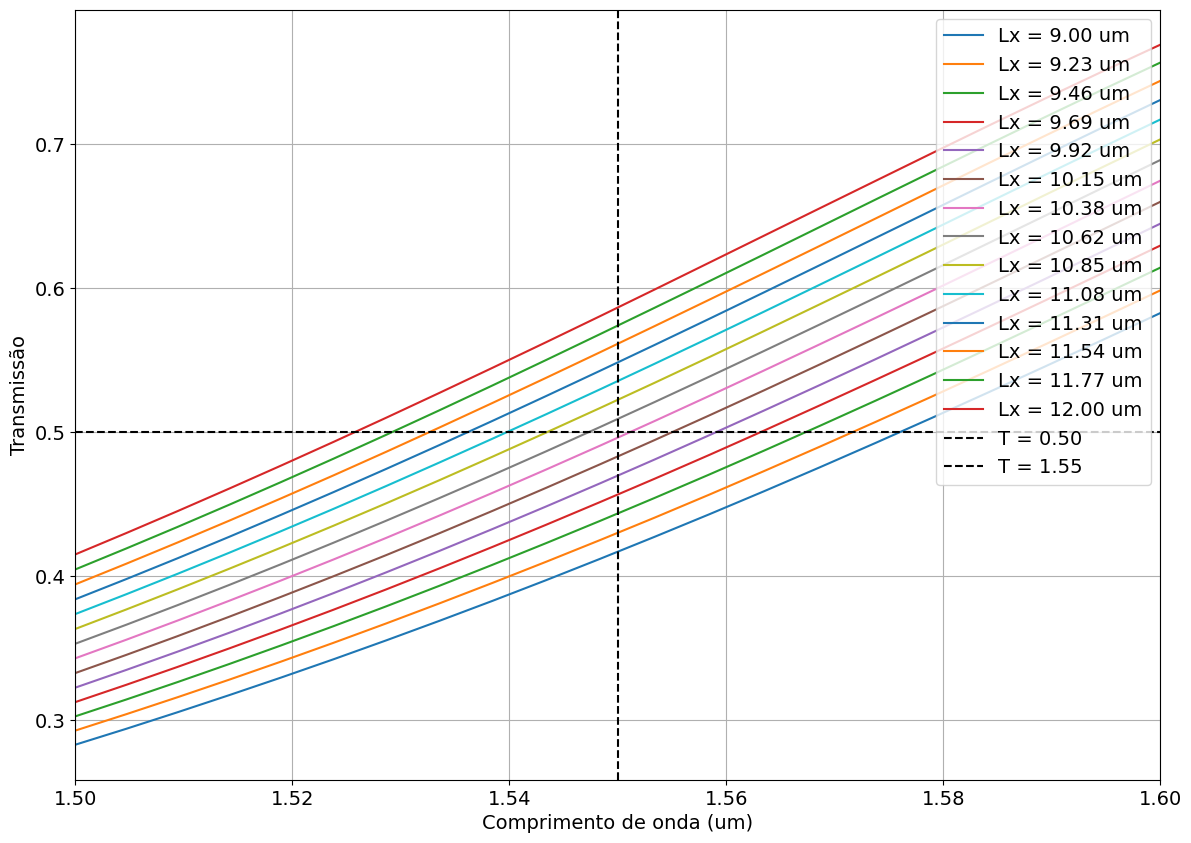

In [371]:
lamb = fdtdApi.getresult("FDTD::ports::port1","T")['lambda']

plt.figure(figsize=(14,10))

for i in range(len(L_x)):  # O número '3' refere-se ao índice [0], [1] e [2] em cada Transmission
    #plt.plot(lamb, np.abs(Transmission_1[j]))  # Plota os valores absolutos da transmissão para cada índice i
    #plt.plot(lamb*1e6, np.abs(Transmission_2[i]))
    #plt.plot(lamb, np.abs(Transmission_3[j]))        
    plt.plot(lamb*1e6, np.abs(Transmission_4[i]),label = 'Lx = %.2f um' %(L_x[i]*1e6))

plt.xlabel("Comprimento de onda (um)", fontsize = 14)
plt.ylabel("Transmissão", fontsize = 14)
plt.xlim(min(lamb*1e6),max(lamb*1e6))
plt.axhline(y = 0.5, linestyle = '--', color='k',label='T = 0.50')
plt.axvline(x = 1.55, linestyle = '--', color='k',label='T = 1.55')
plt.legend(fontsize = 14, loc = 'upper right')
plt.grid()
plt.tick_params(axis='both', labelsize=14)

In [365]:
L_x = np.linspace(10*um, 12*um,14)
print(L_x)

[1.00000000e-05 1.01538462e-05 1.03076923e-05 1.04615385e-05
 1.06153846e-05 1.07692308e-05 1.09230769e-05 1.10769231e-05
 1.12307692e-05 1.13846154e-05 1.15384615e-05 1.16923077e-05
 1.18461538e-05 1.20000000e-05]


In [137]:
if(False):
    fdtdApi.save("FDTD_SIMULACAO")
    fdtdApi.close()